# **Heart Disease classification**


## Contents


1. **age**
2. **sex**
3. **cp =** chest pain type (4 values)
4. **trestbps =** resting blood pressure
5. **chol =** serum cholestoral in mg/dl
6. **fbs =** fasting blood sugar > 120 mg/dl
7. **restecg =** resting electrocardiographic results (values 0,1,2)
8. **thalach =** maximum heart rate achieved
9. **exang =** exercise induced angina
10. **oldpeak =** ST depression induced by exercise relative to rest
11. **slope =** the slope of the peak exercise ST segment
12. **ca =** number of major vessels (0-3) colored by flourosopy
13. **thal =** 3 = normal; 6 = fixed defect; 7 = reversable defect
14. **target =** Classification 


### Importing the libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading csv file using pandas

In [0]:
data = pd.read_csv("/content/heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Description of dataset

In [0]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [0]:
data.shape

(303, 14)

### Checking for missing values if any

In [0]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Average of all attributes for each target

* Gives idea about the average of all attributes for each target category

In [0]:
data.groupby("target").mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


### Data Visualization

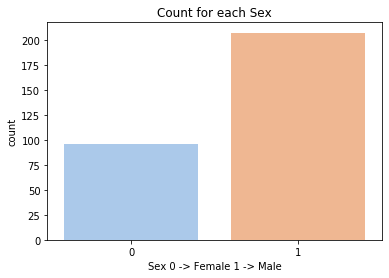

In [0]:
sns.countplot(x = data.sex,palette="pastel")
plt.title("Count for each Sex")
plt.xlabel("Sex 0 -> Female 1 -> Male")
plt.show()

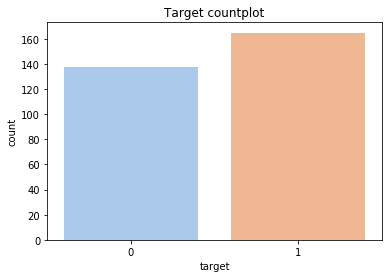

In [0]:
sns.countplot(x = data.target,palette = "pastel")
plt.title("Target countplot")
plt.show()

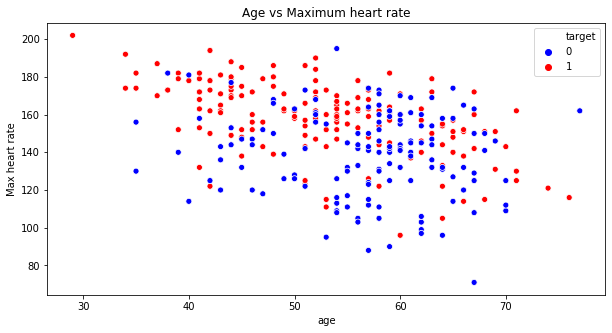

In [0]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = data.age,y = data.thalach,hue = data.target,palette = ["blue","red"])
plt.title("Age vs Maximum heart rate")
plt.ylabel("Max heart rate")
plt.show()

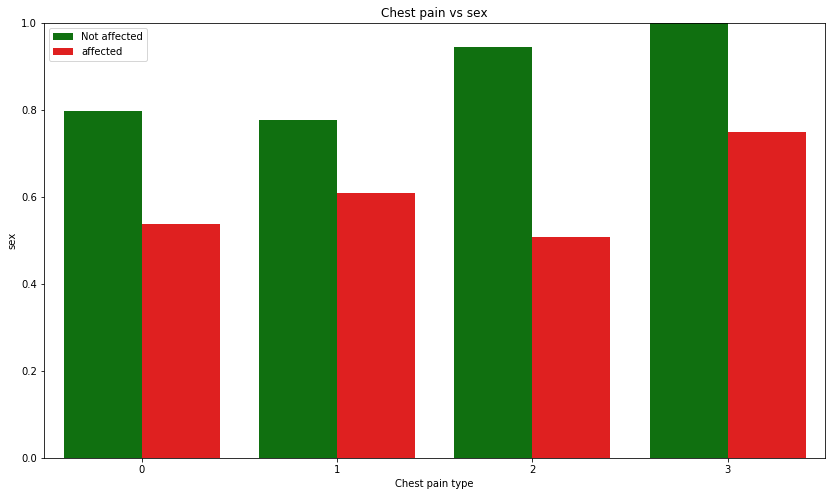

In [0]:
plt.figure(figsize=(14,8))
sns.barplot(x = data.cp,y = data.sex,hue = data.target,palette = ["green","red"],ci = None)
plt.ylim(top = 1)
plt.legend(["Not affected","affected"])
plt.ylim(bottom = 0)
plt.xlabel("Chest pain type")
plt.title("Chest pain vs sex")
plt.show()

In [0]:
pd.crosstab(data.age,data.target).head()

target,0,1
age,,
29,0,1
34,0,2
35,2,2
37,0,2
38,1,2


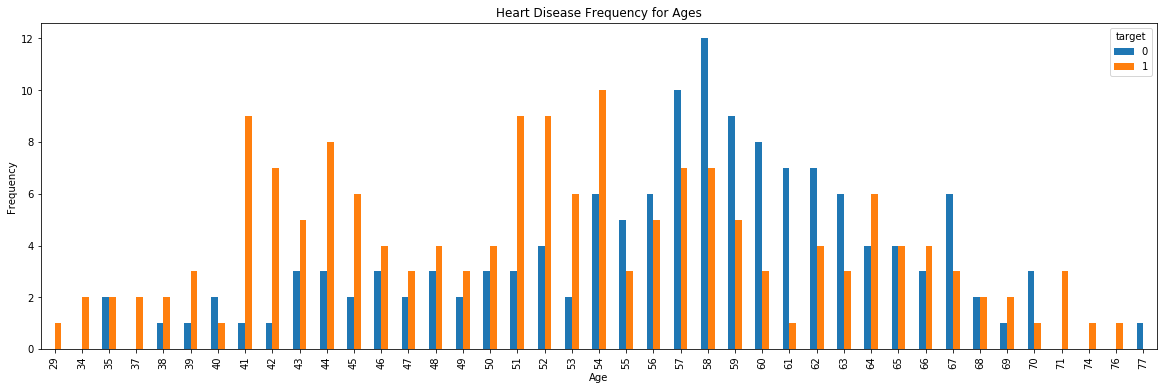

In [0]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [0]:
pd.crosstab(data.sex,data.target).head()

target,0,1
sex,,
0,24,72
1,114,93


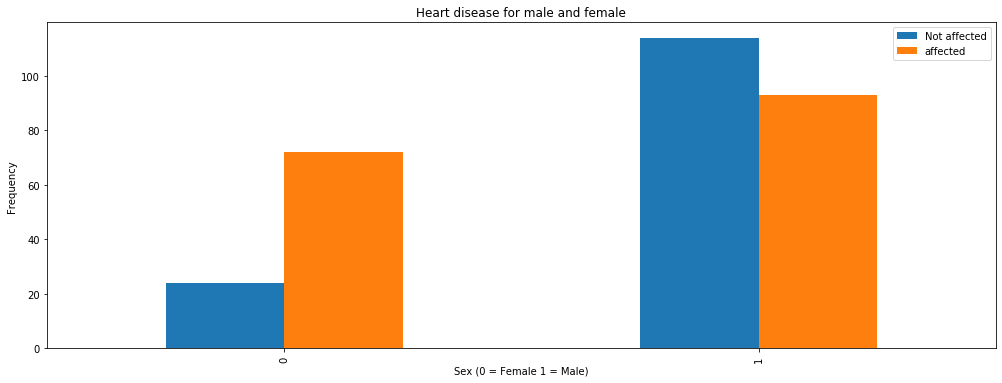

In [0]:
pd.crosstab(data.sex,data.target).plot(kind = "bar",figsize=(17,6))
plt.title("Heart disease for male and female")
plt.xlabel("Sex (0 = Female 1 = Male)")
plt.legend(["Not affected","affected"])
plt.ylabel("Frequency")
plt.show()

In [0]:
pd.crosstab(data.target,data.cp).head()

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


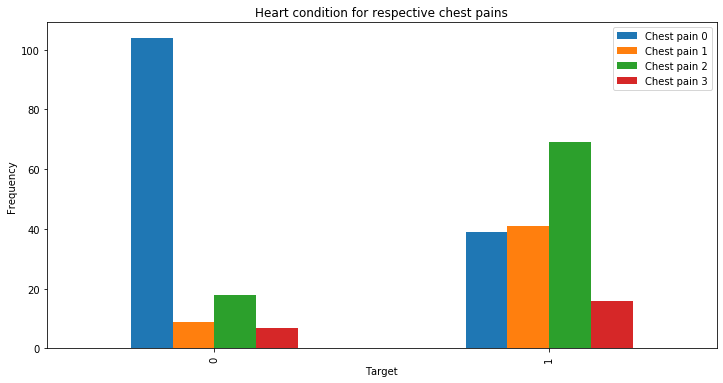

In [0]:
pd.crosstab(data.target,data.cp).plot(kind = "bar",figsize= (12,6))
plt.xlabel("Target")
plt.ylabel("Frequency")
plt.title("Heart condition for respective chest pains")
plt.legend(["Chest pain 0","Chest pain 1","Chest pain 2","Chest pain 3"])
plt.show()

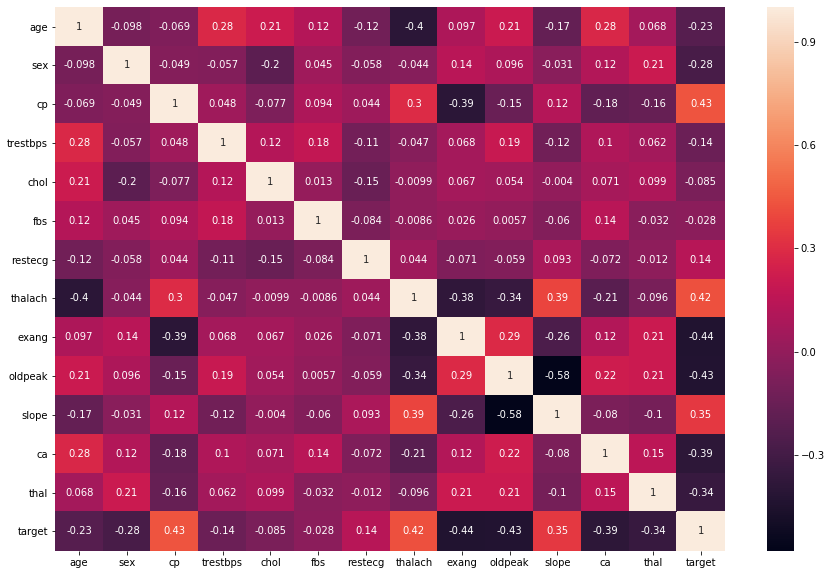

In [0]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot = True)
plt.show()

### Separating X and Y columns

In [0]:
x = data.iloc[:,:13].values
y = data.iloc[:,-1].values

### Normalizing the data to bring it in same range

In [0]:
from sklearn.preprocessing import StandardScaler

scaleX = StandardScaler()
x = scaleX.fit_transform(x)

### Creating Train and Test Data by having 30% data for testing

In [0]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [0]:
from sklearn.metrics import confusion_matrix

### Training Logistic Regression Model

In [0]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(random_state = 10)
logistic.fit(x_train,y_train)
logisticConfusion = confusion_matrix(y_test,logistic.predict(x_test))

### Training Random Forest classifier with 200 trees classifying the labels

In [0]:
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier(n_estimators=200,criterion="entropy",random_state=10)
randomForest.fit(x_train,y_train)
randomForestConfusion = confusion_matrix(y_test,randomForest.predict(x_test))

### Training Support Vector Model using Radial basis function kernel

In [0]:
from sklearn.svm import SVC

svc = SVC(kernel = "rbf",random_state = 10)
svc.fit(x_train,y_train)
svcConfusion = confusion_matrix(y_test,svc.predict(x_test))

### Training Naive Bayes Model

In [0]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(x_train,y_train)
naiveConfusion = confusion_matrix(y_test,naive_bayes.predict(x_test))

### Plotting the confusion matrices for all the four model to compare their performance 

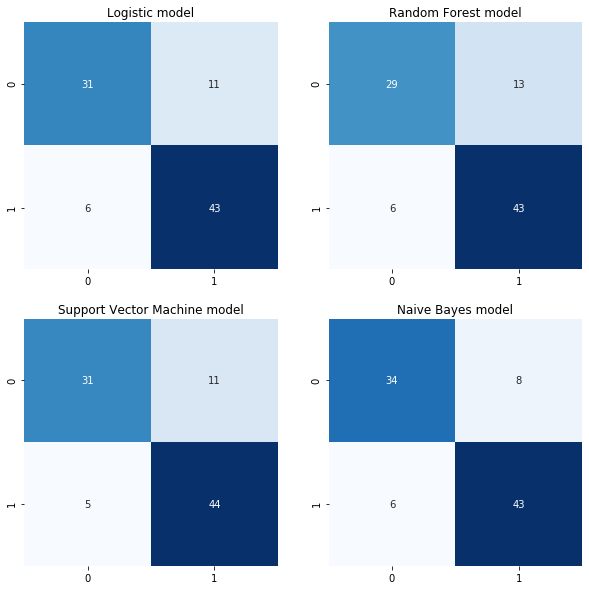

In [0]:
fig,a = plt.subplots(2,2,figsize=(10,10))
sns.heatmap(logisticConfusion,ax = a[0][0],cmap = 'Blues',cbar = False,annot = True)
sns.heatmap(randomForestConfusion,ax = a[0][1],cmap = 'Blues',cbar = False,annot = True)
sns.heatmap(svcConfusion,ax = a[1][0],cmap = 'Blues',cbar = False,annot = True)
sns.heatmap(naiveConfusion,ax = a[1][1],cmap = 'Blues',cbar = False,annot = True)
a[0][0].set_title("Logistic model")
a[0][1].set_title("Random Forest model")
a[1][0].set_title("Support Vector Machine model")
a[1][1].set_title("Naive Bayes model")
plt.show()




### Here Naive Bayes got the best accuracy 

### But we choose Support vector machine as it has less False negative values

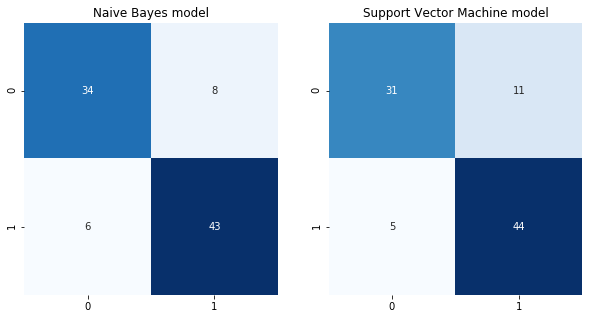

In [0]:
fig,a = plt.subplots(1,2,figsize=(10,5))
sns.heatmap(naiveConfusion,ax = a[0],cmap = 'Blues',cbar = False,annot = True)
sns.heatmap(svcConfusion,ax = a[1],cmap = 'Blues',cbar = False,annot = True)
a[1].set_title("Support Vector Machine model")
a[0].set_title("Naive Bayes model")
plt.show()